# AI Community @ Семинар № 11, весна 2018
# PyTorch. Основы

![](images/pytorch_logo.jpeg)

За установкой PyTorch идти на [оф. сайт](http://pytorch.org/)

Материал адаптирован с [лекций Яндекс ШАД](https://github.com/yandexdataschool/Practical_DL/blob/master/week02_autodiff/seminar_pytorch.ipynb)

Эта тетрадка представляет введение в библиотеку PyTorch, которая все чаще используется для создания и обучения нейронных сетей.

**Плюсы PyTorch:**
1. Простой перенос вычислений на GPU с помощью вызова Tensor.cuda()
1. Автоматическое вычисление градиентов
1. И все это без определения графов, placeholders и сессий (вспоминаем Tensorflow)

## Базовые операции

In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import clear_output
%matplotlib inline

In [2]:
# numpy world

x = np.arange(16).reshape(4,4)

print("X :\n%s\n" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s\n" % (x + 5))
print("X*X^T  :\n%s\n" % np.dot(x, x.T))
print("mean over cols :\n%s\n" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s\n" % (np.cumsum(x, axis=0)))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over cols :
[ 1.5  5.5  9.5 13.5]

cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



In [3]:
# pytorch world

x = np.arange(16).reshape(4,4)

x = torch.from_numpy(x).type(torch.FloatTensor) #or torch.arange(0,16).view(4,4)

print ("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print ("add 5 :\n%s" % (x + 5))
print ("X*X^T  :\n%s" % torch.matmul(x, x.transpose(1, 0)))
print ("mean over cols :\n%s" % torch.mean(x, dim=-1))
print ("cumsum of cols :\n%s" % torch.cumsum(x, dim=0))

X :

  0   1   2   3
  4   5   6   7
  8   9  10  11
 12  13  14  15
[torch.FloatTensor of size 4x4]

X.shape : torch.Size([4, 4])

add 5 :

  5   6   7   8
  9  10  11  12
 13  14  15  16
 17  18  19  20
[torch.FloatTensor of size 4x4]

X*X^T  :

  14   38   62   86
  38  126  214  302
  62  214  366  518
  86  302  518  734
[torch.FloatTensor of size 4x4]

mean over cols :

  1.5000
  5.5000
  9.5000
 13.5000
[torch.FloatTensor of size 4]

cumsum of cols :

  0   1   2   3
  4   6   8  10
 12  15  18  21
 24  28  32  36
[torch.FloatTensor of size 4x4]



На что обратить внимание при переходе с Numpy:
* `x.reshape([1,2,8]) -> x.view(1,2,8)`
* `x.sum(axis=-1) -> x.sum(dim=-1)`
* `x.astype('int64') -> x.type(torch.LongTensor)`

[Иструкции](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users) для перехода от Numpy к PyTorch

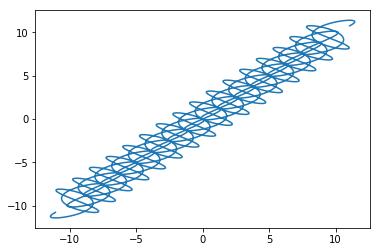

In [4]:
t = torch.linspace(-10, 10, steps = 10000)

x = t - 1.5 * torch.sin(15 * t)
y = t - 1.5 * torch.sin(10 * t)

plt.plot(x.numpy(), y.numpy())

In [5]:
t.cuda()


-10.0000
 -9.9980
 -9.9960
   ⋮    
  9.9960
  9.9980
 10.0000
[torch.cuda.FloatTensor of size 10000 (GPU 0)]

## Автоматическое вычисление градиентов

План следующий:
* Создаем переменную ```a = Variable(data, requires_grad=True)```
* Определяем дифференцируемую функцию ошибки `loss = whatever(a)`
* Вызываем `loss.backward()` для вычисления градиентов по графу
* Получаем градиенты в ```a.grads```

## Пример. Лин. рег. на данных Boston Housing prices

Text(0,0.5,'Price $')

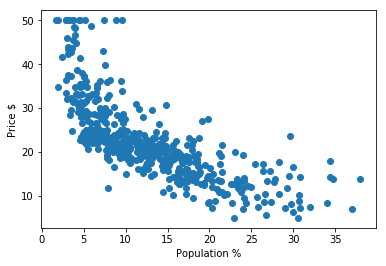

In [6]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
plt.scatter(X[:, -1], y)
plt.xlabel('Population %')
plt.ylabel('Price $')

[Источник](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) Boston dataset

In [7]:
from torch.autograd import Variable

In [8]:
w = Variable(torch.zeros(1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

X = Variable(torch.from_numpy(X.astype(np.float32)[:, -1]) / 10.)
y = Variable(torch.from_numpy(y.astype(np.float32)))

In [9]:
y_pred = w * X + b
loss = (y_pred - y).pow(2).mean()
loss.backward()

w.grad, b.grad

(Variable containing:
 -47.3514
 [torch.FloatTensor of size 1], Variable containing:
 -45.0656
 [torch.FloatTensor of size 1])

Можете запустить ячейку несколько раз, чтобы увидеть, как градиенты суммируются при каждом запуске (они остаются в переменной `grad` после backward). Чтобы градиенты всегда обнулялись после обратного прохода, делайте так:

In [10]:
w.grad.zero_()

Variable containing:
 0
[torch.FloatTensor of size 1]

Обучим линейную регрессию и посмотрим на изменение значения ошибки на обучающей выборке:

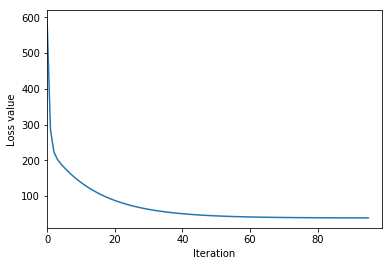

In [11]:
lr = 0.1
epochs = 100

w.data.zero_()
b.data.zero_()

losses = []
for i in range(epochs):
    w.grad.zero_()
    b.grad.zero_()
    
    y_pred = w * X + b
    loss = (y_pred - y).pow(2).mean()
    losses.append(float(loss.data))
    
    loss.backward()
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data
    
    if i % 5 == 0:

        clear_output(True)
        plt.plot(losses)
        plt.xlabel('Iteration');
        plt.ylabel('Loss value');
        plt.xlim([0, epochs - 1])
        plt.show()

#         clear_output(True)
#         plt.scatter(X.data, y)
#         plt.plot(X.data.numpy(), (w * X + b).data.numpy(), color='r')
#         plt.xlabel('Population %')
#         plt.ylabel('Price $')
#         plt.show()

## Пример. Многослойный персептрон на MNIST

In [12]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super(Model, self).__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
               x = F.relu(self.conv1(x))
               return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call .cuda(), etc.
    


In [13]:
x = Variable(torch.zeros(32, 100))
linear_m = nn.Linear(100, 20)

In [14]:
linear_m.forward(x).shape

torch.Size([32, 20])

In [15]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

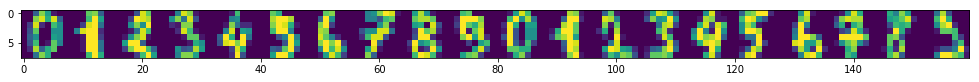

In [16]:
plt.figure(figsize=(17, 17))
imshow(np.hstack(X.reshape((-1, 8, 8))[:20]))

In [26]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential()
        self.model.add_module('linear1', nn.Linear(64, 20))
        self.model.add_module('linear2', nn.Linear(20, 10))
#         self.model.add_module('predition', nn.Softmax(dim=1))
    
    def forward(self, x):
        x = self.model.forward(x)
#         x = F.softmax(x, 1)
        
        return x

In [51]:
mlp = MLP()
mlp.forward(Variable(torch.ones([15, 64])))

Variable containing:
 0.1059  0.0479  0.1638 -0.2209 -0.3953 -0.0151  0.0190 -0.4764  0.1484 -0.7986
 0.1059  0.0479  0.1638 -0.2209 -0.3953 -0.0151  0.0190 -0.4764  0.1484 -0.7986
 0.1059  0.0479  0.1638 -0.2209 -0.3953 -0.0151  0.0190 -0.4764  0.1484 -0.7986
 0.1059  0.0479  0.1638 -0.2209 -0.3953 -0.0151  0.0190 -0.4764  0.1484 -0.7986
 0.1059  0.0479  0.1638 -0.2209 -0.3953 -0.0151  0.0190 -0.4764  0.1484 -0.7986
 0.1059  0.0479  0.1638 -0.2209 -0.3953 -0.0151  0.0190 -0.4764  0.1484 -0.7986
 0.1059  0.0479  0.1638 -0.2209 -0.3953 -0.0151  0.0190 -0.4764  0.1484 -0.7986
 0.1059  0.0479  0.1638 -0.2209 -0.3953 -0.0151  0.0190 -0.4764  0.1484 -0.7986
 0.1059  0.0479  0.1638 -0.2209 -0.3953 -0.0151  0.0190 -0.4764  0.1484 -0.7986
 0.1059  0.0479  0.1638 -0.2209 -0.3953 -0.0151  0.0190 -0.4764  0.1484 -0.7986
 0.1059  0.0479  0.1638 -0.2209 -0.3953 -0.0151  0.0190 -0.4764  0.1484 -0.7986
 0.1059  0.0479  0.1638 -0.2209 -0.3953 -0.0151  0.0190 -0.4764  0.1484 -0.7986
 0.1059  0.0479  0.

In [52]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelBinarizer

class MNISTDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = torch.from_numpy(X.astype(np.float32))
#         y = LabelBinarizer().fit_transform(y)
        self.y = torch.from_numpy(y.astype(np.int))
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        sample = {'image': self.X[idx], 'digit': self.y[idx]}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [53]:
trainset = MNISTDataset(X, y)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=4)

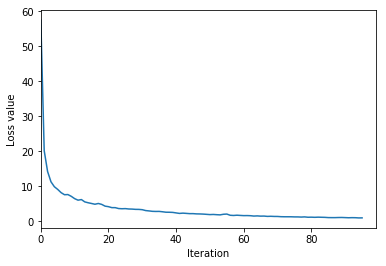

In [64]:
mlp = MLP()
opt = torch.optim.SGD(mlp.parameters(), lr=1e-2)
criterion = nn.CrossEntropyLoss()

epochs = 100

losses = []
for i in range(epochs):
    loss_sum = 0
    for batch in trainloader:
        inputs, labels = Variable(batch['image'].type(torch.FloatTensor)), Variable(batch['digit'])

        outputs = mlp.forward(inputs)
        
        loss = criterion(outputs, labels)
        loss_sum += loss

        mlp.zero_grad()
        loss.backward()
        opt.step()

    losses.append(float(loss_sum.data))
    
    if i % 5 == 0:
        clear_output(True)
        plt.plot(losses)
        plt.xlabel('Iteration');
        plt.ylabel('Loss value');
        plt.xlim([0, epochs - 1])
        plt.show()

### Сверточная сеть на CIFAR-10

Про обучение нейронных сетей материал взят из [документации Pytorch](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

In [65]:
import torch
import torchvision
import torchvision.transforms as transforms

In [66]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [67]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

 ship plane truck horse


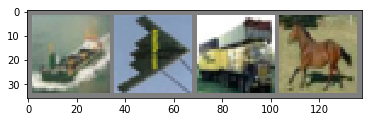

In [68]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [69]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [70]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [71]:
net.cuda(), criterion.cuda()

(Net(
   (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
   (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
   (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
   (fc1): Linear(in_features=400, out_features=120)
   (fc2): Linear(in_features=120, out_features=84)
   (fc3): Linear(in_features=84, out_features=10)
 ), CrossEntropyLoss(
 ))

In [72]:
epochs = 2

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.173
[1,  4000] loss: 1.779
[1,  6000] loss: 1.630
[1,  8000] loss: 1.577
[1, 10000] loss: 1.522
[1, 12000] loss: 1.471
[2,  2000] loss: 1.367
[2,  4000] loss: 1.377
[2,  6000] loss: 1.351
[2,  8000] loss: 1.335
[2, 10000] loss: 1.299
[2, 12000] loss: 1.281
Finished Training


GroundTruth:    cat  ship  ship plane


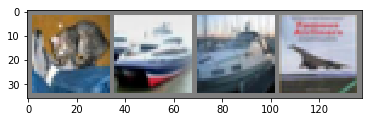

In [74]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [75]:
outputs = net(Variable(images.cuda()))

In [76]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [79]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda())).cpu()
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 55 %
Accuracy of   car : 69 %
Accuracy of  bird : 37 %
Accuracy of   cat : 36 %
Accuracy of  deer : 57 %
Accuracy of   dog : 39 %
Accuracy of  frog : 69 %
Accuracy of horse : 54 %
Accuracy of  ship : 79 %
Accuracy of truck : 61 %
